In [949]:
# importing various model
import pandas as pd
import numpy as np

In [950]:
# loading data
file1=pd.read_excel("Project - 4 - Train Data.xlsx")
file2=pd.read_excel("Project - 4 - Test Data.xlsx")
train_data=file1.copy()
test_data=file2.copy()

In [951]:
train_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [952]:
train_data=train_data.drop(['first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'], axis=1)
train_data.head()

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,CPL001002,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,CPL001003,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,CPL001005,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,CPL001006,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,CPL001008,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


Analysing the numeric Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA037007C8>]],
      dtype=object)

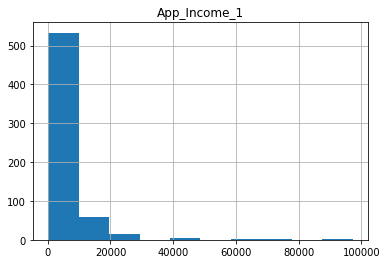

In [953]:
train_data.hist("App_Income_1")

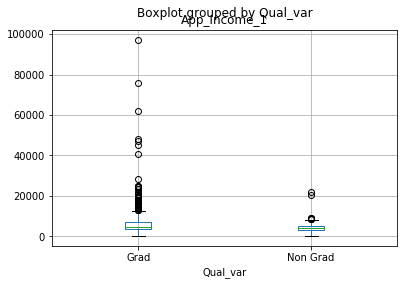

In [954]:
train_data.boxplot(column="App_Income_1", by="Qual_var")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA015B8988>]],
      dtype=object)

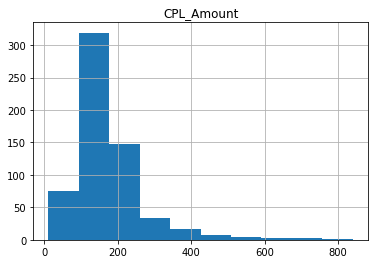

In [955]:
train_data.hist('CPL_Amount')

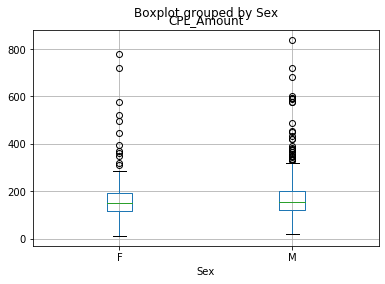

In [956]:
train_data.boxplot(column="CPL_Amount", by="Sex")

Analysing the caategorical data

In [957]:
train_data['Prop_Area'].value_counts()

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64

In [958]:
train_data['Sex'].value_counts()

M    489
F    112
Name: Sex, dtype: int64

In [959]:
train_data['Marital_Status'].value_counts()

Y    398
N    213
Name: Marital_Status, dtype: int64

In [960]:
train_data['Qual_var'].value_counts()

Grad        480
Non Grad    134
Name: Qual_var, dtype: int64

In [961]:
train_data['SE'].value_counts()

N    500
Y     82
Name: SE, dtype: int64

In [962]:
pd.crosstab(train_data['Credit_His'], train_data['CPL_Status'], margins=True)

CPL_Status,N,Y,All
Credit_His,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Dealing with outliers in Loan amount and applicant income

In [963]:
# log transformationn
train_data['Total_Income']=train_data['App_Income_1']+train_data['App_Income_2']

In [964]:
train_data['log_CPL_Amount']=np.log(train_data['CPL_Amount'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA03365D08>]],
      dtype=object)

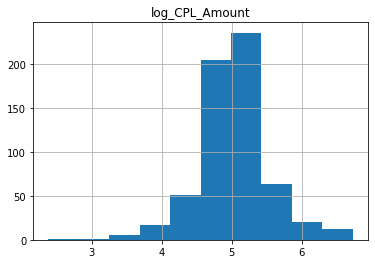

In [965]:
train_data.hist('log_CPL_Amount')

Fill missing Value in train data set

In [966]:
train_data['Sex'].fillna(train_data['Sex'].mode()[0],inplace=True)

In [967]:
train_data['Marital_Status'].fillna(train_data['Marital_Status'].mode()[0],inplace=True)

In [968]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)

In [969]:
train_data['Credit_His'].fillna(train_data['Credit_His'].mode()[0],inplace=True)

In [970]:
train_data['Prop_Area'].fillna(train_data['Prop_Area'].mode()[0],inplace=True)

In [971]:
train_data['Qual_var'].fillna(train_data['Qual_var'].mode()[0],inplace=True)

In [972]:
train_data['SE'].fillna(train_data['SE'].mode()[0],inplace=True)

In [973]:
train_data['CPL_Term'].fillna(train_data['CPL_Term'].mode()[0], inplace=True)

In [974]:
train_data['CPL_Amount'].fillna(train_data["CPL_Amount"].mean(), inplace=True)

In [975]:
train_data['log_CPL_Amount']=np.log(train_data['CPL_Amount'])

In [976]:
train_data.dtypes

Loanapp_ID         object
Sex                object
Marital_Status     object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
CPL_Status         object
Total_Income      float64
log_CPL_Amount    float64
dtype: object

Label encoding Categorical data in train data set

In [977]:
cal=['Sex',"Marital_Status",'Dependents','Qual_var','SE','Prop_Area']

In [978]:
from sklearn.preprocessing import LabelEncoder
for a in cal:
    le=LabelEncoder()
    train_data[a]=le.fit_transform(train_data[a].astype('str'))

In [979]:
train_data.head()

,Loanapp_ID,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income,log_CPL_Amount
0,CPL001002,1,0,0,0,0,7018.8,0.0,175.805882,360.0,1.0,2,Y,7018.8,5.169380
1,CPL001003,1,1,1,0,0,5499.6,1809.6,153.600000,360.0,1.0,0,N,7309.2,5.034352
2,CPL001005,1,1,0,0,1,3600.0,0.0,79.200000,360.0,1.0,2,Y,3600.0,4.371976
3,CPL001006,1,1,0,1,0,3099.6,2829.6,144.000000,360.0,1.0,2,Y,5929.2,4.969813
4,CPL001008,1,0,0,0,0,7200.0,0.0,169.200000,360.0,1.0,2,Y,7200.0,5.131081


In [980]:
train_data.describe()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,Total_Income,log_CPL_Amount
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,6484.151140,1945.494958,175.805882,342.410423,0.855049,1.037459,8429.646098,5.040491
std,0.386497,0.476373,1.009623,0.413389,0.340446,7330.850008,3511.498043,102.438603,64.428629,0.352339,0.787482,7750.396647,0.505444
min,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,10.800000,12.000000,0.000000,0.000000,1730.400000,2.379546
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3453.000000,0.000000,120.000000,360.000000,1.000000,0.000000,4999.200000,4.787492
50%,1.000000,1.000000,0.000000,0.000000,0.000000,4575.000000,1426.200000,153.600000,360.000000,1.000000,1.000000,6499.800000,5.034352
75%,1.000000,1.000000,1.000000,0.000000,0.000000,6954.000000,2756.700000,200.100000,360.000000,1.000000,2.000000,9026.100000,5.298814
max,1.000000,1.000000,3.000000,1.000000,1.000000,97200.000000,50000.400000,840.000000,480.000000,1.000000,2.000000,97200.000000,6.733402


In [981]:
le1=LabelEncoder()
train_data['CPL_Status']=le1.fit_transform(train_data['CPL_Status'])
train_data['log_income']=np.log((train_data['App_Income_1']+train_data['App_Income_2']))

Creating a Model

In [982]:
predictors=['Sex', 'Marital_Status', 'Dependents', 'Qual_var', 'SE', 'CPL_Term', 'Credit_His', 'Prop_Area', 'log_CPL_Amount','log_income']
outcome=['CPL_Status']

In [983]:
# splitting train data in train and test data for model
from sklearn.model_selection import train_test_split
train, test = train_test_split(train_data, random_state=500, test_size=0.2)

In [984]:
from sklearn import metrics

In [985]:
# DecissionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5, random_state=500)
dtr.fit(train[predictors], train[outcome])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=500, splitter='best')

In [986]:
predict=dtr.predict(test[predictors])

In [987]:
predict=np.round(predict)

In [988]:
predict

array([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1.])

In [989]:
accurracy=metrics.accuracy_score(predict,test[outcome])

In [990]:
accurracy

0.7804878048780488

In [991]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[predictors], train[outcome])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [992]:
predict=lr.predict(test[predictors])
predict=np.round(predict)
accurracy=metrics.accuracy_score(predict, test[outcome])
accurracy

0.8048780487804879

In [993]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression(random_state=100)
lo.fit(train[predictors], train[outcome])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [994]:
predict=lo.predict(test[predictors])
predict=np.round(predict)
accurracy=metrics.accuracy_score(predict, test[outcome])
accurracy

0.8048780487804879

Test Data

In [995]:
test_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area
0,CPL001015,M,Y,Dollie,Scafe,dscafe0@is.gd,02 Garrison Pass,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Urban
1,CPL001022,M,Y,Kim,Arne,karne9@infoseek.co.jp,6568 Dwight Point,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,Urban
2,CPL001031,M,Y,Niccolo,Ramble,nramblef@gov.uk,3504 Lukken Park,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Urban
3,CPL001035,M,Y,Rabbi,Haig,rhaigg@tiny.cc,1334 Florence Way,2,Grad,N,2808.0,3055.2,120.0,360.0,NaN,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban
4,CPL001051,M,N,Gracie,Winear,gwinearj@devhub.com,9800 Ridge Oak Crossing,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,Urban


In [996]:
test_data.columns

Index(['Loanapp_ID', 'Sex', 'Marital_Status', 'first_name', 'last_name',
       'email', 'address', 'Dependents', 'Qual_var', 'SE', 'App_Income_1',
       'App_Income_2', 'CPL_Amount', 'CPL_Term', 'Credit_His', 'INT_ID',
       'Prev_ID', 'AGT_ID', 'Prop_Area'],
      dtype='object')

In [997]:
cal

['Sex', 'Marital_Status', 'Dependents', 'Qual_var', 'SE', 'Prop_Area']

In [998]:
# checking for nan in categorical value
for a in cal:
    print(test_data[a].unique())

['M' 'F' nan]
['Y' 'N']
[0 1 2 '3+' nan]
['Grad' 'Non Grad']
['N' 'Y' nan]
['Urban' 'Semi U' 'Rural']


Filling Missing value in categorical value in test_data

In [999]:
test_data['Sex'].fillna(test_data['Sex'].mode()[0], inplace=True)

In [1000]:
test_data['SE'].fillna(test_data['SE'].mode()[0], inplace=True)

In [1001]:
test_data['Dependents'].fillna(method='ffill', inplace=True)

In [1002]:
test_data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,367.000000,367.000000,367.000000,361.000000,338.000000,3.670000e+02
mean,5766.719346,1883.493188,162.795640,342.537396,0.825444,4.845769e+09
std,5892.822479,2801.078518,73.330269,65.156643,0.380150,2.905368e+09
min,0.000000,0.000000,33.600000,6.000000,0.000000,3.347182e+07
25%,3436.800000,0.000000,120.000000,360.000000,1.000000,2.291309e+09
50%,4543.200000,1230.000000,150.000000,360.000000,1.000000,4.783504e+09
75%,6072.000000,2916.600000,189.000000,360.000000,1.000000,7.215261e+09
max,87034.800000,28800.000000,660.000000,480.000000,1.000000,9.995180e+09


Filling missing value in test data for numerical value

In [1019]:
test_data['Credit_His'].fillna(test_data['Credit_His'].mode()[0], inplace=True)

In [1020]:
test_data['CPL_Term'].fillna(test_data['CPL_Term'].mode()[0], inplace=True)

In [1021]:
test_data.describe()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prop_Area,log_CPL_Amount,log_income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.847411,0.228883,0.100817,5766.719346,1883.493188,162.795640,342.822888,0.839237,4.845769e+09,1.079019,5.006351,8.799585
std,0.393417,0.482122,1.080699,0.420687,0.301498,5892.822479,2801.078518,73.330269,64.658402,0.367814,2.905368e+09,0.824337,0.417366,0.475716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.600000,6.000000,0.000000,3.347182e+07,0.000000,3.514526,7.655391
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3436.800000,0.000000,120.000000,360.000000,1.000000,2.291309e+09,0.000000,4.787492,8.514630
50%,1.000000,1.000000,0.000000,0.000000,0.000000,4543.200000,1230.000000,150.000000,360.000000,1.000000,4.783504e+09,1.000000,5.010635,8.739697
75%,1.000000,1.000000,2.000000,0.000000,0.000000,6072.000000,2916.600000,189.000000,360.000000,1.000000,7.215261e+09,2.000000,5.241742,9.033111
max,1.000000,1.000000,3.000000,1.000000,1.000000,87034.800000,28800.000000,660.000000,480.000000,1.000000,9.995180e+09,2.000000,6.492240,11.374063


Label encoding cat variable in test data

In [1022]:
for a in cal:
    test_data[a]=le.fit_transform(test_data[a].astype('str'))

Log transformation of CPL amount and appication income

In [1023]:
test_data['log_CPL_Amount']=np.log(test_data['CPL_Amount'])
test_data['log_income']=np.log((test_data['App_Income_1']+test_data['App_Income_2']))

In [1024]:
test_data.describe()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prop_Area,log_CPL_Amount,log_income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.847411,0.228883,0.100817,5766.719346,1883.493188,162.795640,342.822888,0.839237,4.845769e+09,1.079019,5.006351,8.799585
std,0.393417,0.482122,1.080699,0.420687,0.301498,5892.822479,2801.078518,73.330269,64.658402,0.367814,2.905368e+09,0.824337,0.417366,0.475716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.600000,6.000000,0.000000,3.347182e+07,0.000000,3.514526,7.655391
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3436.800000,0.000000,120.000000,360.000000,1.000000,2.291309e+09,0.000000,4.787492,8.514630
50%,1.000000,1.000000,0.000000,0.000000,0.000000,4543.200000,1230.000000,150.000000,360.000000,1.000000,4.783504e+09,1.000000,5.010635,8.739697
75%,1.000000,1.000000,2.000000,0.000000,0.000000,6072.000000,2916.600000,189.000000,360.000000,1.000000,7.215261e+09,2.000000,5.241742,9.033111
max,1.000000,1.000000,3.000000,1.000000,1.000000,87034.800000,28800.000000,660.000000,480.000000,1.000000,9.995180e+09,2.000000,6.492240,11.374063


In [1025]:
predictors

['Sex',
 'Marital_Status',
 'Dependents',
 'Qual_var',
 'SE',
 'CPL_Term',
 'Credit_His',
 'Prop_Area',
 'log_CPL_Amount',
 'log_income']

In [1031]:
test_predict=lo.predict(test_data[predictors])

In [1034]:
test_predict=le1.inverse_transform(test_predict)

In [1035]:
test_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [1037]:
test_data['Predicted_CPL_Status']=test_predict

In [1040]:
test_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,...,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area,log_CPL_Amount,log_income,Predicted_CPL_Status
0,CPL001015,1,1,Dollie,Scafe,dscafe0@is.gd,02 Garrison Pass,0,0,0,...,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,2,4.882802,8.834046,Y
1,CPL001022,1,1,Kim,Arne,karne9@infoseek.co.jp,6568 Dwight Point,1,0,0,...,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,2,5.018603,8.610902,Y
2,CPL001031,1,1,Niccolo,Ramble,nramblef@gov.uk,3504 Lukken Park,2,0,0,...,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,2,5.519860,9.006999,Y
3,CPL001035,1,1,Rabbi,Haig,rhaigg@tiny.cc,1334 Florence Way,2,0,0,...,120.0,360.0,1.0,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,2,4.787492,8.676451,Y
4,CPL001051,1,0,Gracie,Winear,gwinearj@devhub.com,9800 Ridge Oak Crossing,0,1,0,...,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,2,4.539030,8.276700,Y
